In [1]:
import numpy as np
import pandas as pd
import geopandas
import geoplot
import matplotlib.pyplot as plt
import mapclassify as mc

df = pd.read_csv(
    "data/wosis_latest_orgc.csv",
    usecols=["X", "Y", "upper_depth", "lower_depth", "orgc_value_avg"]
)
df.columns = ["lng", "lat", "upper_depth", "lower_depth", "orgc_value_avg"]
df = df[df["lower_depth"] <=30]

In [27]:
# Collapse data for average Organic Carbon Value over all strata (0-30cm), where available
grouped_df = df.groupby(['lng', 'lat']).mean()
grouped_df = grouped_df.reset_index()
ocarbon = grouped_df[["lng", "lat", "orgc_value_avg"]]
ocarbon.to_pickle("data/ocarbon.pkl")

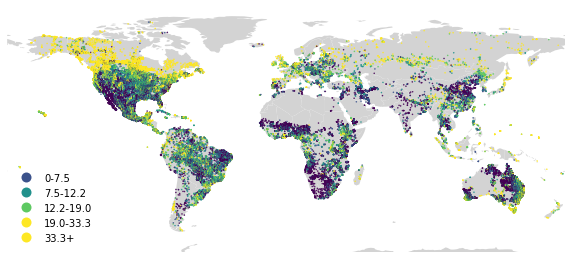

In [4]:
# Plot the points
gdf = geopandas.GeoDataFrame(
    ocarbon, 
    geometry=geopandas.points_from_xy(ocarbon.lng, ocarbon.lat)
)

scheme = mc.Quantiles(gdf['orgc_value_avg'], k=5)

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

ax = geoplot.polyplot(
    world,
    edgecolor='None',
    facecolor='lightgray',
    figsize=(10, 5)
)

geoplot.pointplot(
    gdf,
    hue='orgc_value_avg',
    scheme=scheme,
    ax=ax,
    s=0.5,
    legend=True,
    legend_var='hue',
    legend_values=[1, 2, 3, 4, 5],
    legend_labels=['0-7.5', '7.5-12.2', '12.2-19.0', '19.0-33.3', '33.3+'],
    legend_kwargs={'frameon': False}
)

plt.savefig("imgs/wosis_points.png", dpi=150)

In [6]:
# output to shapefile (for loading into Earth Engine)
gdf.to_file("wosis.shp")

In [34]:
from scipy.special import factorial

def poisson(k, lamb):
    """poisson pdf, parameter lamb is the fit parameter"""
    return (lamb**k/factorial(k)) * np.exp(-lamb)

s = ocarbon["orgc_value_avg"]

lamb = ocarbon.orgc_value_avg.mean()

# plot the pmf using lamb as as an estimate for `lambda`. 
# let sort the counts in the columns first.

s.apply(poisson, lamb).plot()

TypeError: poisson() missing 1 required positional argument: 'lamb'